In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import scipy as sp
import nilearn as nl
from nilearn.surface import load_surf_data
import os, shutil, urllib.request
import cortex as cx
from matplotlib import rc
import nibabel as nb
from nibabel import cifti2
import h5py
import matplotlib.pyplot as plt

import prfpy
from scipy.io import loadmat
from prfpy.rf import *
from prfpy.timecourse import *
from prfpy.stimulus import PRFStimulus2D
from prfpy.model import Iso2DGaussianModel, CSS_Iso2DGaussianModel
from prfpy.fit import Iso2DGaussianFitter, CSS_Iso2DGaussianFitter

/tank/klundert/anaconda3/envs/cf/lib/python3.10/site-packages/nilearn/glm/__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '


In [15]:
## define some functions for plotting and loading data

idxs = h5py.File('/tank/shared/timeless/atlases/cifti_indices.hdf5', "r")
lidxs = np.array(idxs['Left_indices'])
ridxs = np.array(idxs['Right_indices'])
allidxs = np.concatenate([lidxs, ridxs])

def get_cortex(dat):
    l, r, = dat[lidxs], dat[ridxs]

    # Replace the minus 1
    l[lidxs == -1] = np.zeros_like(l[lidxs == -1])
    r[ridxs == -1] = np.zeros_like(r[ridxs == -1])

    # Last dimension time.
    # l, r = l.T, r.T

    data = np.concatenate([l, r])
    return data


def angle(x0, y0):
    return np.angle(x0 + y0 * 1j)

def ecc(x0, y0):
    return np.abs(x0 + y0 * 1j)

/tmp/ipykernel_3045405/1577846601.py:17: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  im = ax.pcolormesh(t, r, c.T,norm=norm, cmap=colormap_r)  #plot the colormesh on axis with colormap


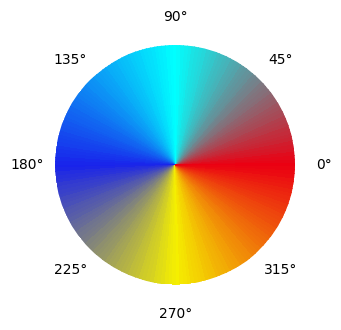

In [9]:
## plot colormap as colorwheel

import matplotlib
from matplotlib.colors import ListedColormap
colormap_r = ListedColormap(cx.utils.get_cmap('Retinotopy_RYBCR').colors[::-1])
fg = plt.figure(figsize=(3,3))
ax = fg.add_axes([0.1,0.1,0.8,0.8], projection='polar')

# Define colormap normalization for 0 to 2*pi
norm = matplotlib.colors.Normalize(0, 2*np.pi) 

n = 200  #the number of secants for the mesh
t = np.linspace(0,2*np.pi,n)   #theta values
r = np.linspace(0,1,2)        #radius values change 0.6 to 0 for full circle
rg, tg = np.meshgrid(r,t)      #create a r,theta meshgrid
c = tg                         #define color values as theta value
im = ax.pcolormesh(t, r, c.T,norm=norm, cmap=colormap_r)  #plot the colormesh on axis with colormap
ax.set_yticklabels([])                   #turn of radial tick labels (yticks)

ax.tick_params(pad=10,labelsize=10)      #cosmetic changes to tick labels
ax.spines['polar'].set_visible(False)    #turn off the axis spine.

In [16]:
## load data
dnparams = np.load('/scratch/2021/nprf_ss/derivatives/prf-fits/sub-02/dn-prf/sub-02_task-prf_space-fsLR_den-170k_desc-preproc_normPRF_params_cv_fold1.npy')

In [ ]:
## flatmap params

rsq_threshold = 0.4
subject = 2

In [ ]:
## load data
dnparams = np.load(f'/scratch/2021/nprf_ss/derivatives/prf-fits/sub-0{subject}/dn-prf/sub-0{subject}_task-prf_space-fsLR_den-170k_desc-preproc_normPRF_params_cv_fold1.npy')

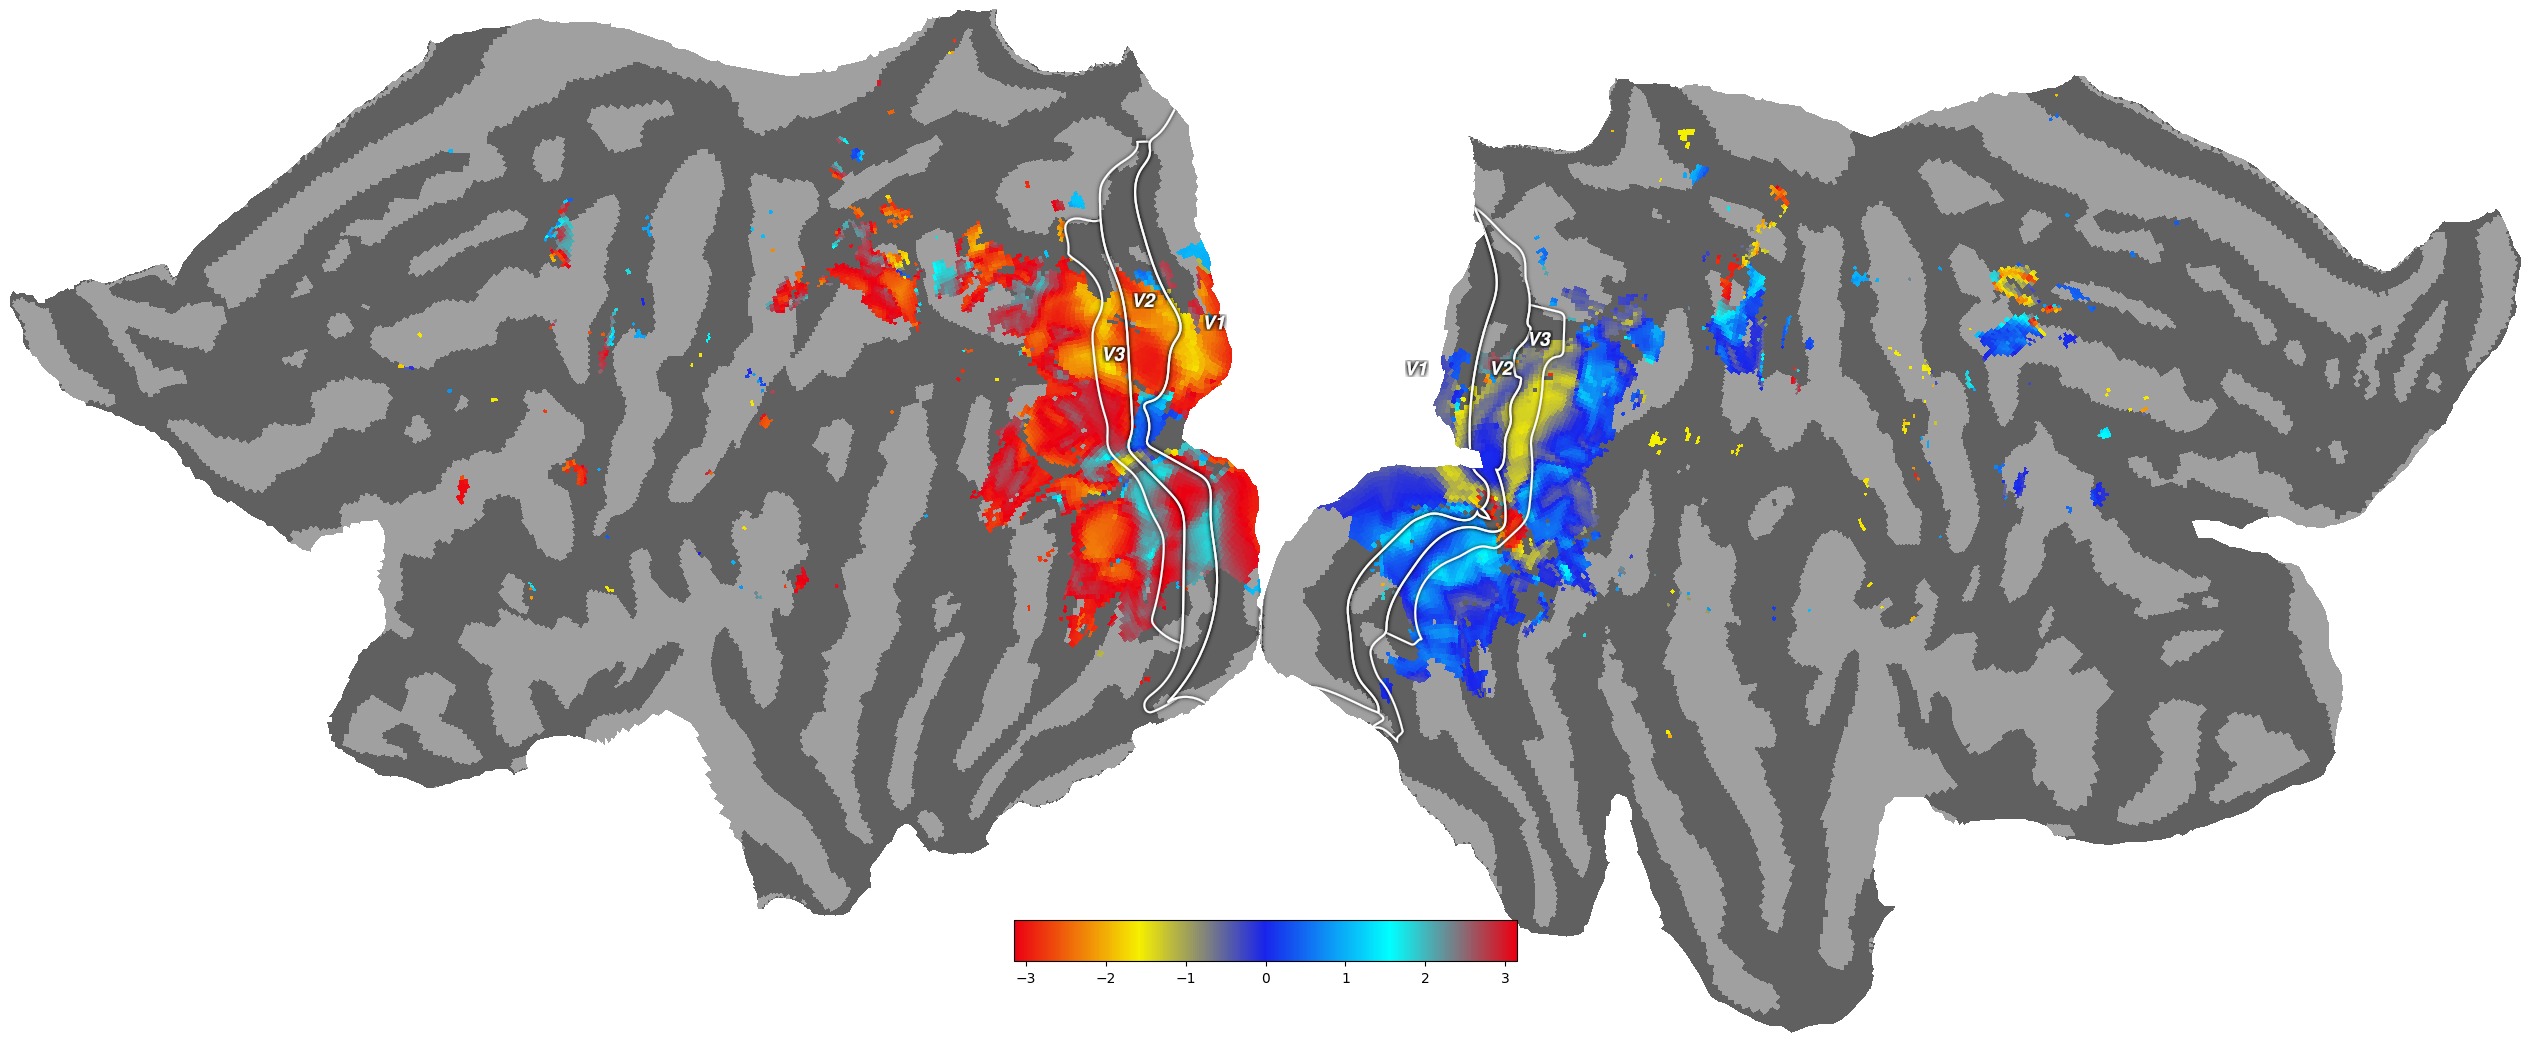

In [17]:
toplot = np.zeros([118584,])
toplot[:] = np.nan

toplot[get_cortex(dnparams[:,-1]) > rsq_threshold] = angle(get_cortex(dnparams[:,1]), get_cortex(dnparams[:,0])*-1)[get_cortex(dnparams[:,-1]) > rsq_threshold]
s2angle = np.copy(toplot)

cx.quickshow(cx.Vertex(s2angle, subject='hcp_999999', cmap='Retinotopy_RYBCR', vmin=-np.pi, vmax=np.pi), with_curvature=True);

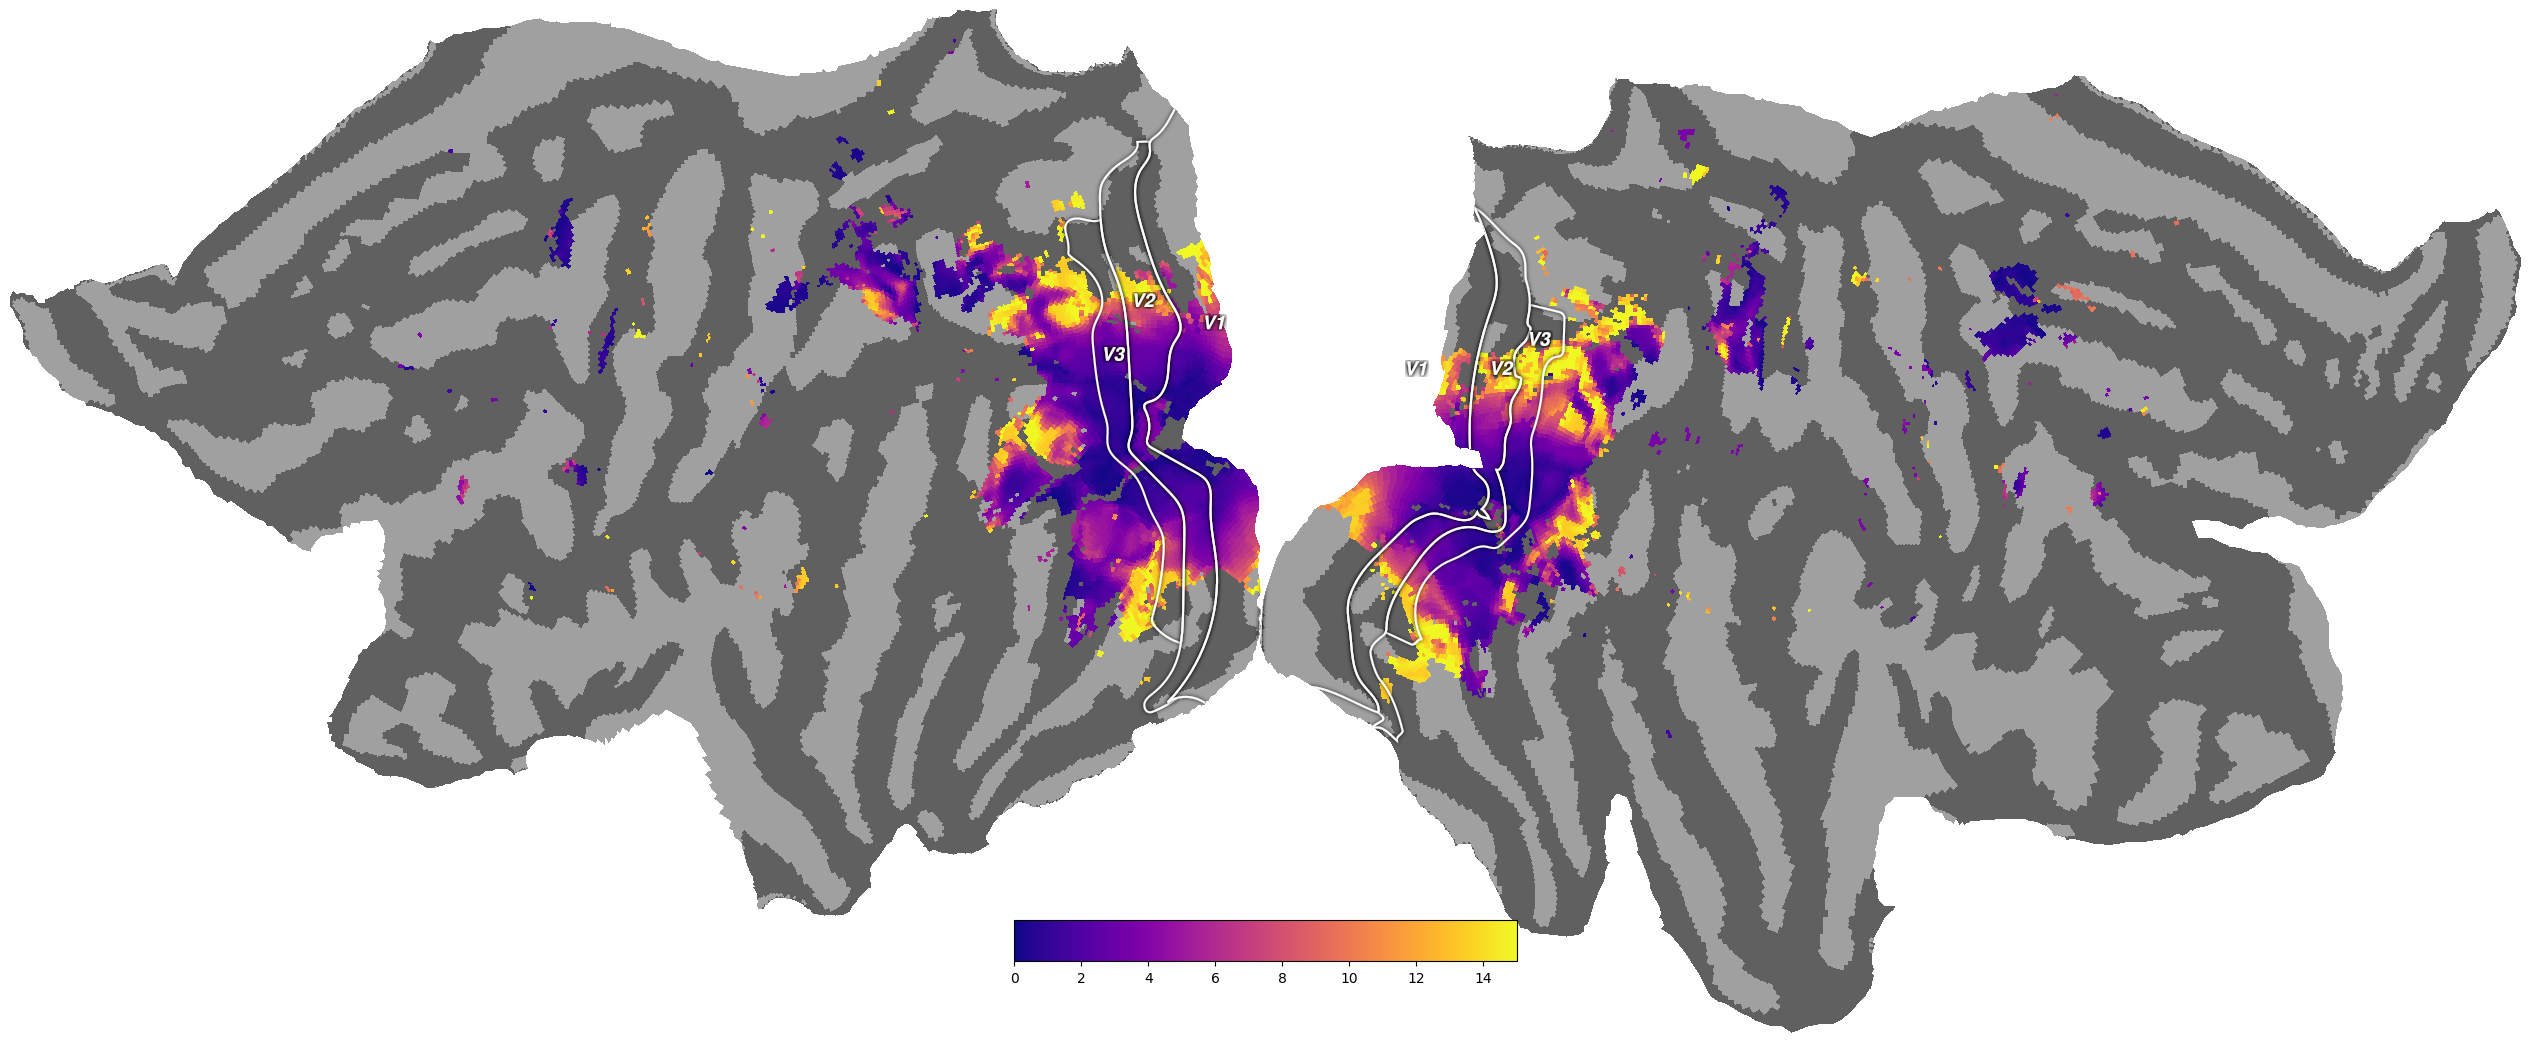

In [18]:
toplot = np.zeros([118584,])
toplot[:] = np.nan

toplot[get_cortex(dnparams[:,-1]) > rsq_threshold] = ecc(get_cortex(dnparams[:,1]), get_cortex(dnparams[:,0])*-1)[get_cortex(dnparams[:,-1]) > rsq_threshold]
s2ecc = np.copy(toplot)


cx.quickshow(cx.Vertex(s2ecc, subject='hcp_999999', cmap='plasma', vmin=0, vmax=15), with_curvature=True);

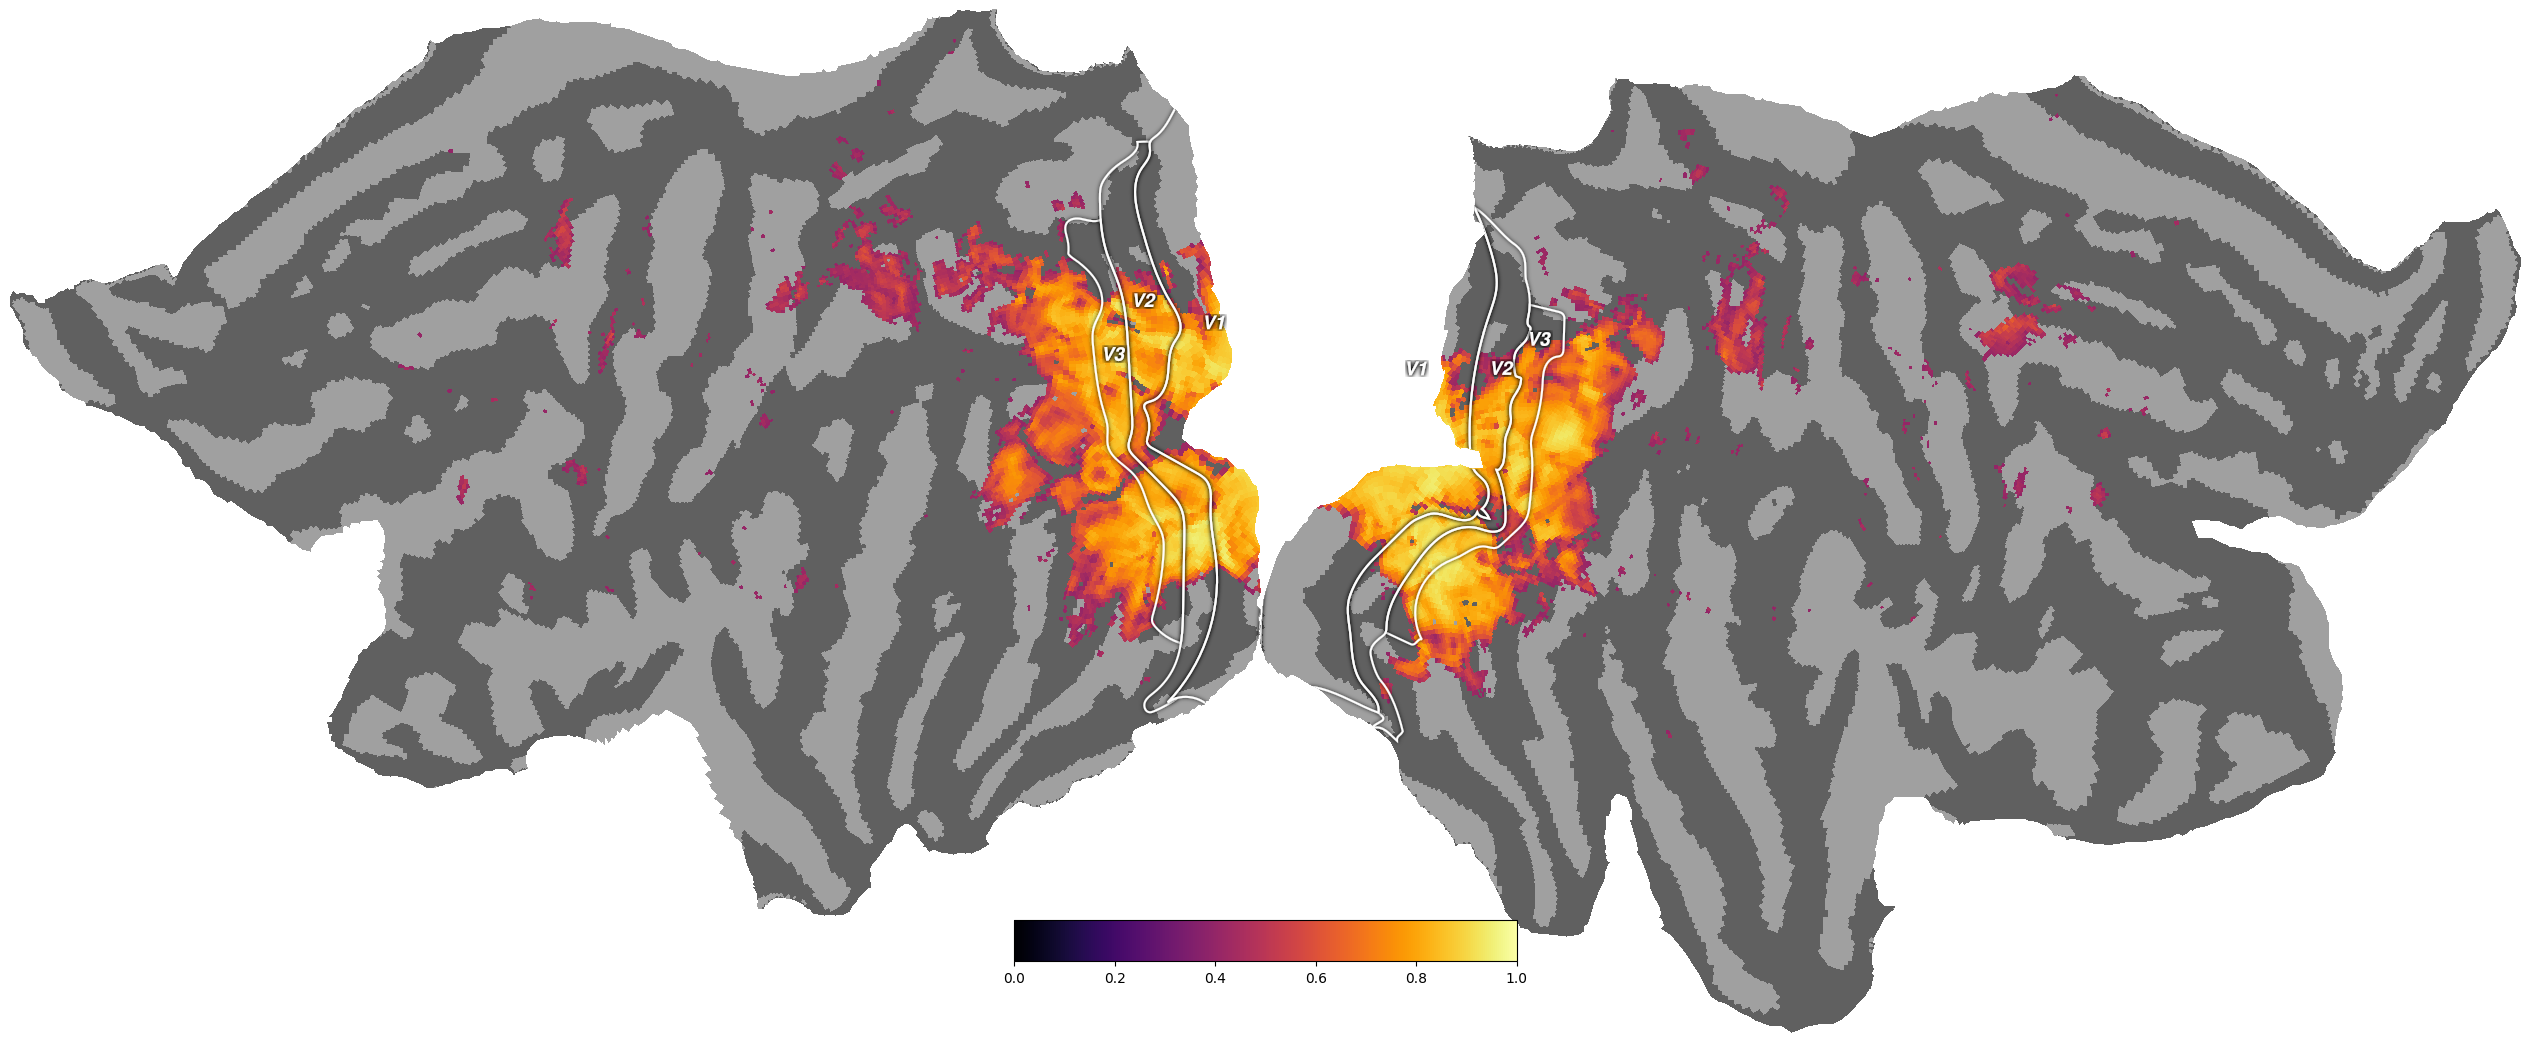

In [20]:
toplot = np.zeros([118584,])
toplot[:] = np.nan

toplot[get_cortex(dnparams[:,-1]) > rsq_threshold] = get_cortex(dnparams[:,-1])[get_cortex(dnparams[:,-1]) > rsq_threshold]
rsq = np.copy(toplot)


cx.quickshow(cx.Vertex(rsq, subject='hcp_999999', cmap='inferno', vmin=0, vmax=1), with_curvature=True);

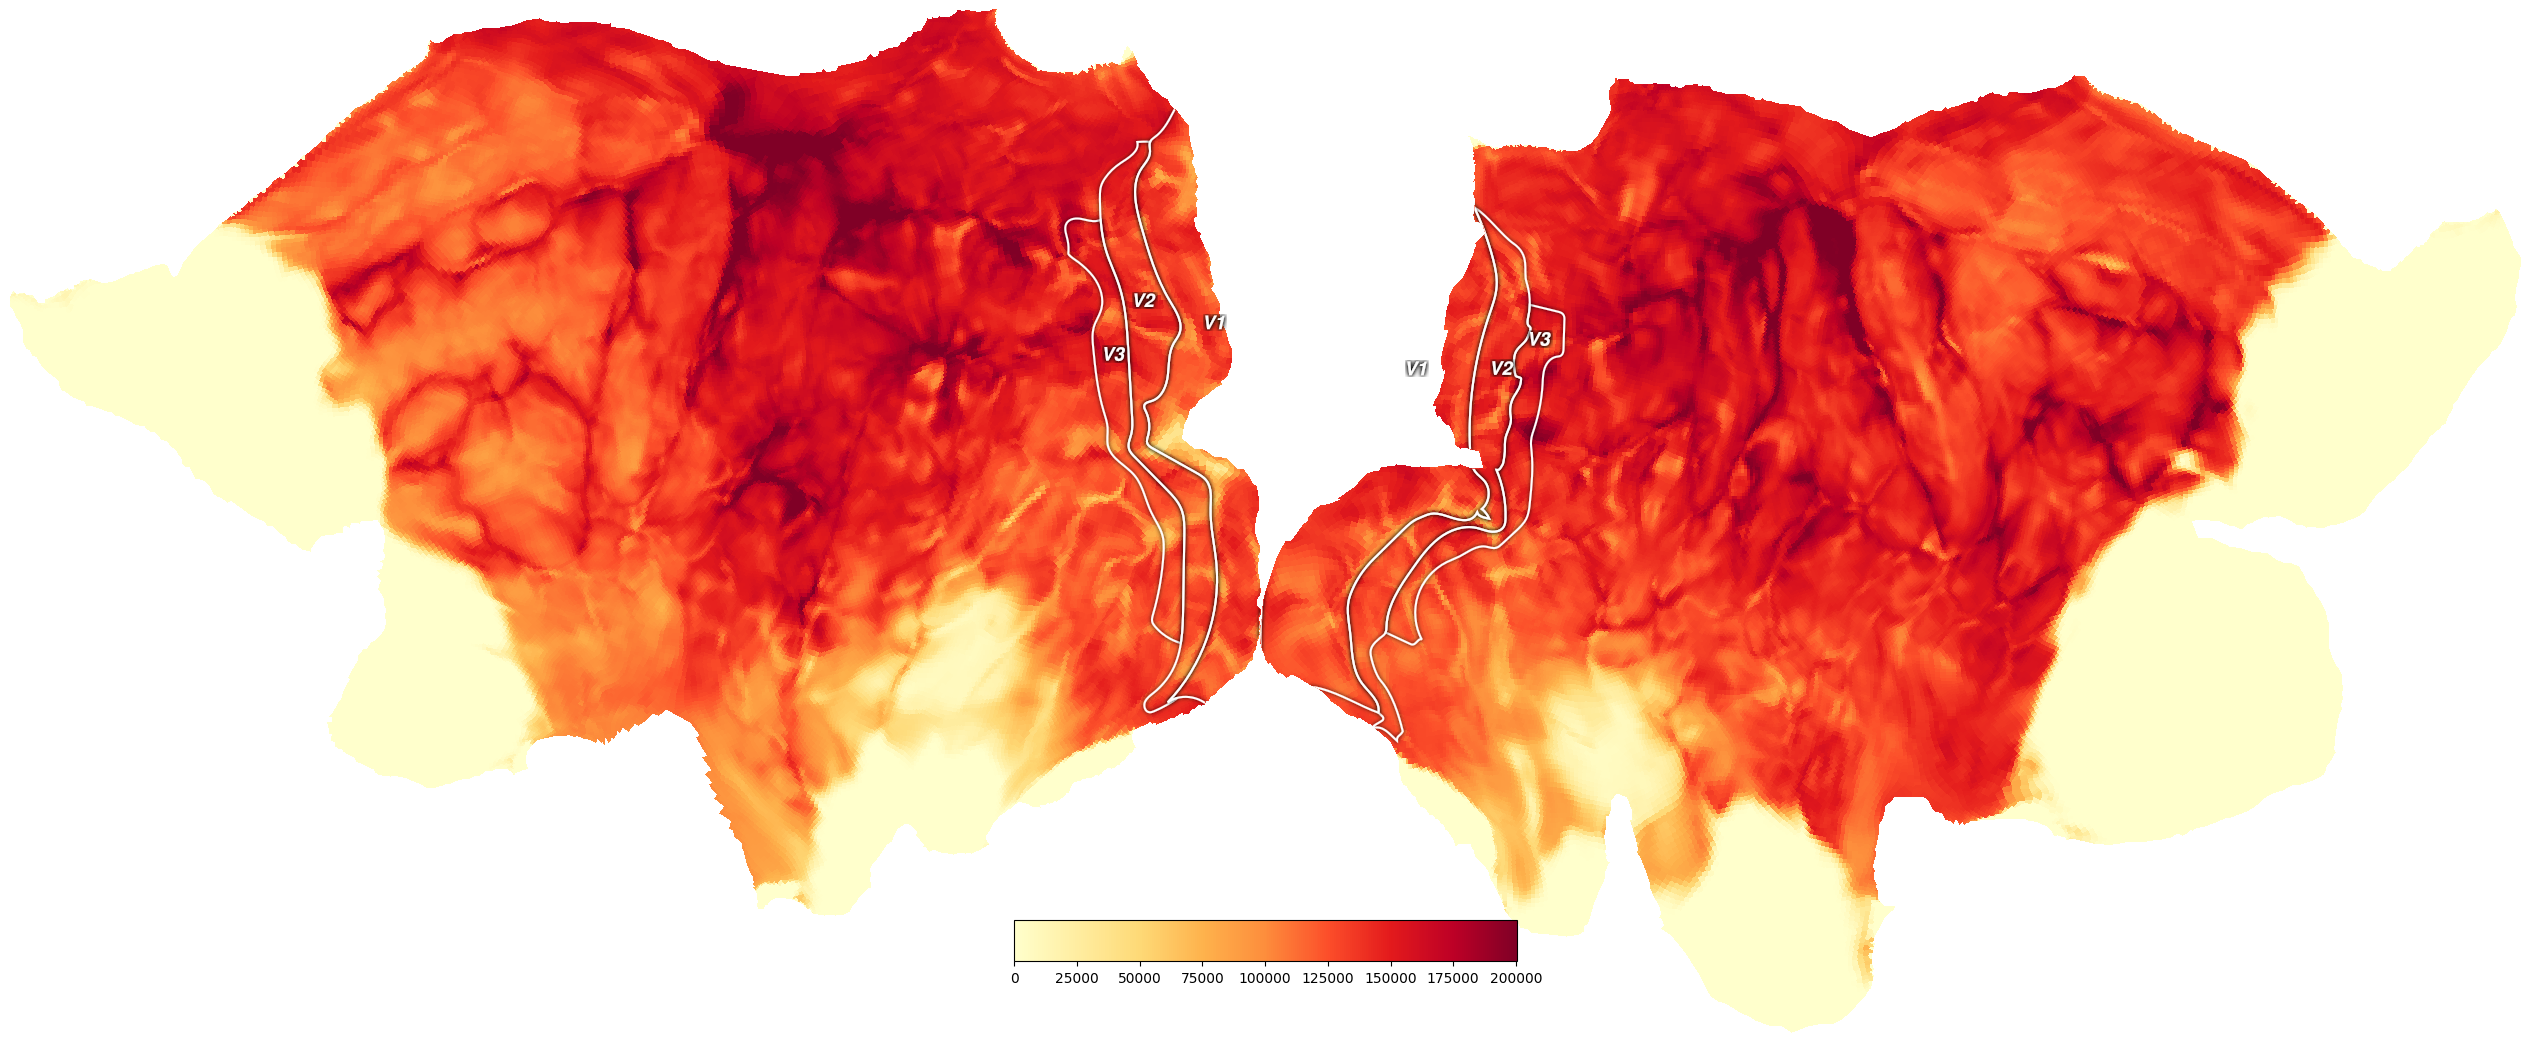

In [22]:
toplot = np.zeros([118584,])
toplot[:] = np.nan
mean_api = np.load(f'/scratch/2021/nprf_ss/derivatives/Scalars/sub-0{sub}/sub-0{subject}_task-prf_mean-api')
toplot[get_cortex(dnparams[:,-1]) > 0.4] = mean_api[get_cortex(dnparams[:,-1]) > 0.4]
rsq = np.copy(toplot)


cx.quickshow(cx.Vertex(rsq, subject='hcp_999999', cmap='YlOrRd'), with_curvature=True);